# Machine Learning Project 

## Part 1

Importing libraries and loading the test and train datasets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")



In [2]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


Dropping duplicates


In [3]:
train_df.drop_duplicates(inplace=True)

Checking for existence of NULL values


In [4]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64

Checking for Outliers

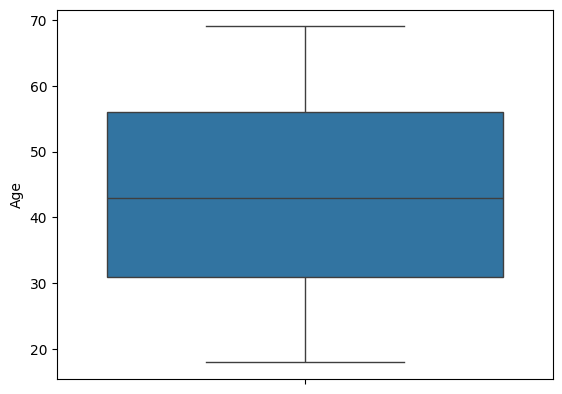

<Figure size 1000x1000 with 0 Axes>

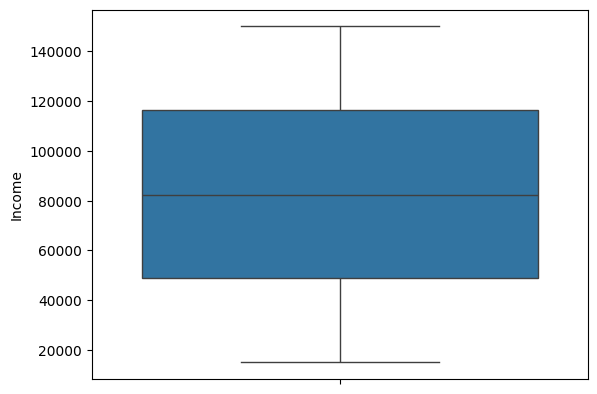

<Figure size 1000x1000 with 0 Axes>

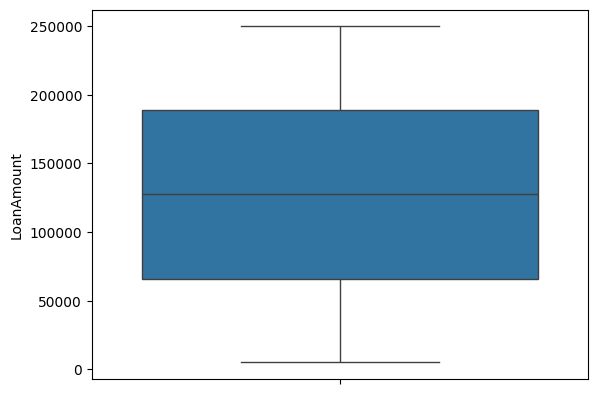

<Figure size 1000x1000 with 0 Axes>

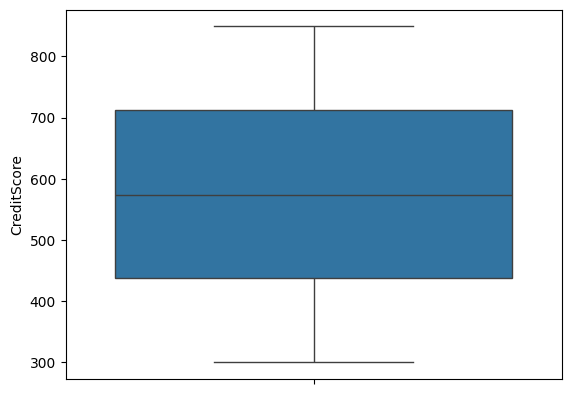

<Figure size 1000x1000 with 0 Axes>

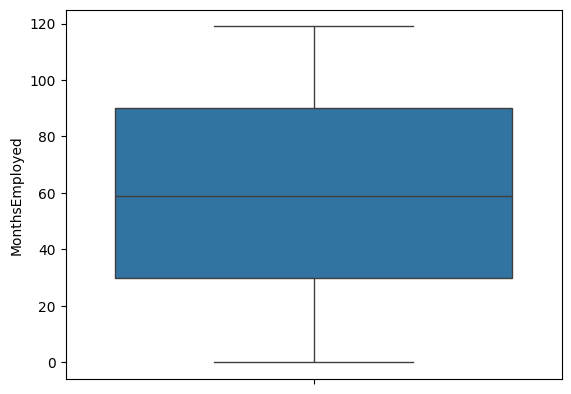

<Figure size 1000x1000 with 0 Axes>

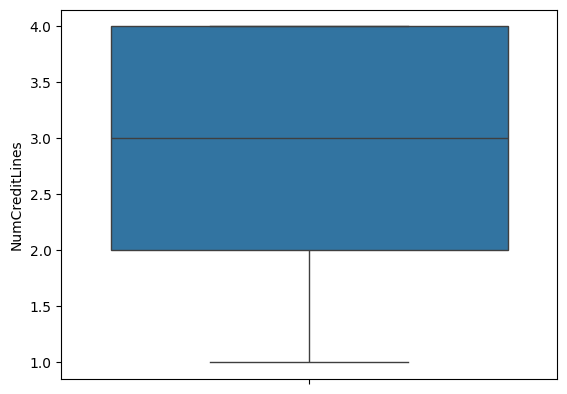

<Figure size 1000x1000 with 0 Axes>

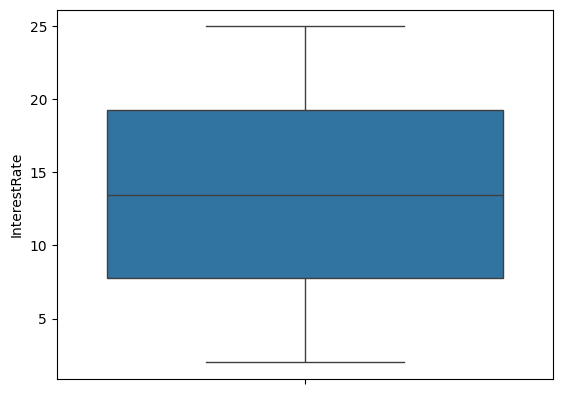

<Figure size 1000x1000 with 0 Axes>

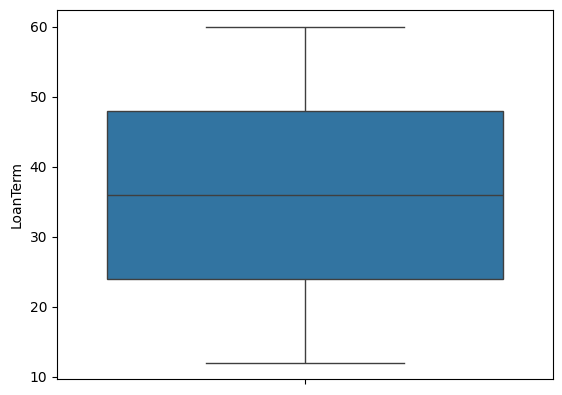

<Figure size 1000x1000 with 0 Axes>

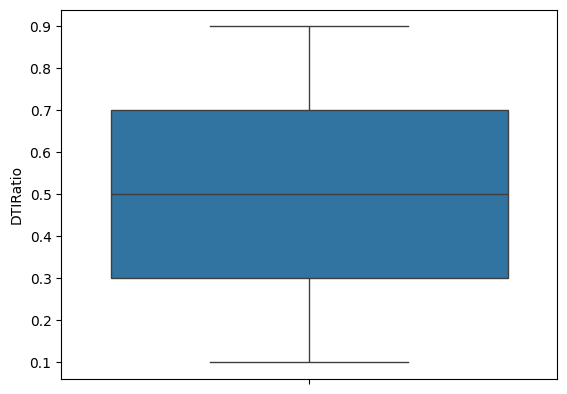

<Figure size 1000x1000 with 0 Axes>

In [9]:
sns.boxplot(train_df["Age"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["Income"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["LoanAmount"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["CreditScore"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["MonthsEmployed"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["NumCreditLines"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["InterestRate"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["LoanTerm"])
plt.figure(figsize=(10, 10))
plt.show()

sns.boxplot(train_df["DTIRatio"])
plt.figure(figsize=(10, 10))
plt.show()



No outliers so we move on  to training.

First we will check which of these values needs to be encoded .

In [5]:
unique_values = train_df['Education'].unique()

print(unique_values)

['High School' "Master's" "Bachelor's" 'PhD']


In [6]:
unique_values = train_df['EmploymentType'].unique()

print(unique_values)

['Self-employed' 'Unemployed' 'Part-time' 'Full-time']


In [7]:
unique_values = train_df['MaritalStatus'].unique()

print(unique_values)

['Single' 'Divorced' 'Married']


In [8]:
unique_values = train_df['LoanPurpose'].unique()

print(unique_values)

['Business' 'Education' 'Other' 'Auto' 'Home']


In [9]:
unique_values = train_df['HasMortgage'].unique()

print(unique_values)

['Yes' 'No']


In [10]:
unique_values = train_df['HasDependents'].unique()

print(unique_values)

['No' 'Yes']


In [11]:
unique_values = train_df['HasCoSigner'].unique()

print(unique_values)

['No' 'Yes']


Mapping Yes And No to binary output 1 and 0 respectively

In [12]:
train_df['HasMortgage'] = train_df['HasMortgage'].map({'Yes': 1, 'No': 0})
test_df['HasMortgage'] = test_df['HasMortgage'].map({'Yes': 1, 'No': 0})

In [13]:
train_df['HasDependents'] = train_df['HasDependents'].map({'Yes': 1, 'No': 0})
test_df['HasDependents'] = test_df['HasDependents'].map({'Yes': 1, 'No': 0})

In [14]:
train_df['HasCoSigner'] = train_df['HasCoSigner'].map({'Yes': 1, 'No': 0})
test_df['HasCoSigner'] = test_df['HasCoSigner'].map({'Yes': 1, 'No': 0})

Doing One hot encoding of the below given columns

In [15]:
train_df = pd.get_dummies(train_df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'])
test_df = pd.get_dummies(test_df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'])

In [16]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [22]:
train_df.keys()

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

Choosing the columns as inputs ,in this case we are cosnidering all columns as inputs.

In [17]:
dataset_x=train_df[[  'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner',
       "Education_Bachelor's", 'Education_High School', "Education_Master's",
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']]
t_dataset_x=test_df[[ 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner',
       "Education_Bachelor's", 'Education_High School', "Education_Master's",
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']]
dataset_y=train_df['Default']

In [18]:
x_train=dataset_x
y_train=dataset_y
x_test=t_dataset_x

Making a dictionary of parameters over which we wish to do grid search.

Now we apply grid search to find best parameters and update those into best models.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
# Dictionary to store the best models and their parameters
best_models = {}

In [ ]:
# Define parameter grids for each model
param_grids = {
    'decision_tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'xgboost': {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'random_forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'lasso': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1'],
        'solver': ['liblinear']  # Required for L1 regularization in logistic regression
    },
    'ridge': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2']
    }
}

# Train and tune Decision Tree Classifier
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grids['decision_tree'], cv=5)
grid_dt.fit(x_train, y_train)
best_models['decision_tree'] = grid_dt.best_estimator_

# Train and tune XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic' if len(y_train.unique()) == 2 else 'multi:softmax')
grid_xgb = GridSearchCV(xgb, param_grids['xgboost'], cv=5)
grid_xgb.fit(x_train, y_train)
best_models['xgboost'] = grid_xgb.best_estimator_

# Train and tune Random Forest Classifier
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grids['random_forest'], cv=5)
grid_rf.fit(x_train, y_train)
best_models['random_forest'] = grid_rf.best_estimator_

# Train and tune Logistic Regression with L1 penalty (Lasso)
lasso = LogisticRegression()
grid_lasso = GridSearchCV(lasso, param_grids['lasso'], cv=5)
grid_lasso.fit(x_train, y_train)
best_models['lasso'] = grid_lasso.best_estimator_

# Train and tune Logistic Regression with L2 penalty (Ridge)
ridge = LogisticRegression()
grid_ridge = GridSearchCV(ridge, param_grids['ridge'], cv=5)
grid_ridge.fit(x_train, y_train)
best_models['ridge'] = grid_ridge.best_estimator_

# For standard Logistic Regression without regularization, fit the model directly
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
best_models['logistic'] = logistic

# Train AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(x_train, y_train)
ada_predictions = ada.predict(x_test)
best_models['AdaBoost'] = ada

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors based on your data
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)
best_models['KNN'] = knn

# Train Naive Bayes Classifier (Gaussian)
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)
best_models['NaiveBayes'] = nb

# Display the best models and parameters
for model_name, model in best_models.items():
    print(f"Best {model_name} model:\n{model}\n")


KeyboardInterrupt: 

Making predictions with each of the models

In [25]:


predictions = {}

# Make predictions with each best model
for model_name, model in best_models.items():
    predictions[model_name] = model.predict(x_test)
    print(f"Predictions from {model_name} model:\n{predictions[model_name]}\n")



c:\Users\Shashwat Chaturvedi\OneDrive - iiit-b\college\academics\Third_Year\sem5\ML\assignments\Project\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Assigning predictions to one variable each

In [ ]:
dt_predictions=predictions["decision_tree"]
xgb_predictions=predictions["xgboost"]
rf_predictions=predictions["random_forest"]
lasso_predictions=predictions["lasso"]
ridge_predictions=predictions["ridge"]
linear_predictions=predictions["logistic"]

Saving the predictions into csv files .

In [29]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction':  predictions["KNN"]
})

# 5. Save to CSV
results.to_csv('knn_predictions.csv',index=False)

In [30]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': predictions["AdaBoost"]
})

# 5. Save to CSV
results.to_csv('adaboost_predictions.csv',index=False)

In [31]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': predictions["NaiveBayes"]
})

# 5. Save to CSV
results.to_csv('nb_predictions.csv',index=False)

In [2]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': dt_predictions
})

# 5. Save to CSV
results.to_csv('dt_predictions.csv',index=False)

NameError: name 'pd' is not defined

In [ ]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': xgb_predictions
})

# 5. Save to CSV
results.to_csv('xgb_predictions.csv',index=False)

In [ ]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': rf_predictions
})

# 5. Save to CSV
results.to_csv('rf_predictions.csv',index=False)

In [ ]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': lasso_predictions
})

# 5. Save to CSV
results.to_csv('lasso_predictions.csv',index=False)

In [ ]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': ridge_predictions
})

# 5. Save to CSV
results.to_csv('ridge_predictions.csv',index=False)

In [ ]:
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': linear_predictions
})

# 5. Save to CSV
results.to_csv('linear_predictions.csv',index=False)

### Skew reduction:-

Performing Adaptive Synthetic oversampling on the data and storing them in new variables.

In [43]:
from imblearn.over_sampling import ADASYN

In [44]:
adasyn = ADASYN(random_state=50)
x_train_with_sd, y_train_with_sd = adasyn.fit_resample(x_train, y_train)

### Training Part 1 models on skew reduced data

Making dictionary for doing Grid search over.

In [28]:
# Dictionary to store the best models and their parameters
best_models = {}

# Define parameter grids for each model
param_grids = {
    'decision_tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'xgboost': {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'random_forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'lasso': {
        'C': [0.1, 1.0],
        'penalty': ['l1'],
        'solver': ['liblinear']  # Required for L1 regularization in logistic regression
    },
    'ridge': {
        'C': [0.1, 1.0],
        'penalty': ['l2']
    }
}

Training all the models done in part 1.

In [ ]:
# Train AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(x_train_with_sd, y_train_with_sd)
ada_predictions = ada.predict(x_test)
best_models['AdaBoost'] = ada

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors based on your data
knn.fit(x_train_with_sd, y_train_with_sd)
knn_predictions = knn.predict(x_test)
best_models['KNN'] = knn

# Train Naive Bayes Classifier (Gaussian)
nb = GaussianNB()
nb.fit(x_train_with_sd, y_train_with_sd)
nb_predictions = nb.predict(x_test)
best_models['NaiveBayes'] = nb

In [31]:
# Train and tune XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic' if len(y_train.unique()) == 2 else 'multi:softmax')
grid_xgb = GridSearchCV(xgb, param_grids['xgboost'], cv=5)
grid_xgb.fit(x_train, y_train)
best_models['xgboost'] = grid_xgb.best_estimator_

In [32]:
# Train and tune Decision Tree Classifier
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grids['decision_tree'], cv=5)
grid_dt.fit(x_train, y_train)
best_models['decision_tree'] = grid_dt.best_estimator_

In [33]:
# Train and tune Random Forest Classifier
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grids['random_forest'], cv=5)
grid_rf.fit(x_train, y_train)
best_models['random_forest'] = grid_rf.best_estimator_

In [34]:
# Train and tune Logistic Regression with L1 penalty (Lasso)
lasso = LogisticRegression()
grid_lasso = GridSearchCV(lasso, param_grids['lasso'], cv=5)
grid_lasso.fit(x_train, y_train)
best_models['lasso'] = grid_lasso.best_estimator_

In [35]:
# Train and tune Logistic Regression with L2 penalty (Ridge)
ridge = LogisticRegression()
grid_ridge = GridSearchCV(ridge, param_grids['ridge'], cv=5)
grid_ridge.fit(x_train, y_train)
best_models['ridge'] = grid_ridge.best_estimator_


c:\Users\Shashwat Chaturvedi\OneDrive - iiit-b\college\academics\Third_Year\sem5\ML\assignments\Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shashwat Chaturvedi\OneDrive - iiit-b\college\academics\Third_Year\sem5\ML\assignments\Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

In [36]:
# Display the best models and parameters
for model_name, model in best_models.items():
    print(f"Best {model_name} model:\n{model}\n")

Best xgboost model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Best decision_tree model:
DecisionTreeClassifier(max_depth=10)

Best random_forest model:
RandomForestClassifier(min_samples_split=5)

Best lasso model:
LogisticRegression(penalty='l1', solver='liblinear')

Best ridge model:
L

In [37]:
predictions = {}

# Make predictions with each best model
for model_name, model in best_models.items():
    predictions[model_name] = model.predict(x_test)
    print(f"Predictions from {model_name} model:\n{predictions[model_name]}\n")


Predictions from xgboost model:
[0 0 0 ... 0 0 0]

Predictions from decision_tree model:
[0 0 0 ... 0 0 0]

Predictions from random_forest model:
[0 0 0 ... 0 0 0]

Predictions from lasso model:
[0 0 0 ... 0 0 0]

Predictions from ridge model:
[0 0 0 ... 0 0 0]



Storing the predictions in csv files.

In [38]:
dt_predictions=predictions["decision_tree"]
xgb_predictions=predictions["xgboost"]
rf_predictions=predictions["random_forest"]
lasso_predictions=predictions["lasso"]
ridge_predictions=predictions["ridge"]
# linear_predictions=predictions["logistic"]

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': dt_predictions
})

# 5. Save to CSV
results.to_csv('dt_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': xgb_predictions
})

# 5. Save to CSV
results.to_csv('xgb_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': rf_predictions
})

# 5. Save to CSV
results.to_csv('rf_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': lasso_predictions
})

# 5. Save to CSV
results.to_csv('lasso_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': ridge_predictions
})

# 5. Save to CSV
results.to_csv('ridge_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction':  predictions["KNN"]
})

# 5. Save to CSV
results.to_csv('knn_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': predictions["AdaBoost"]
})

# 5. Save to CSV
results.to_csv('adaboost_predictions_sd.csv',index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],  # Accessing PassengerId correctly
    'Prediction': predictions["NaiveBayes"]
})

# 5. Save to CSV
results.to_csv('nb_predictions_sd.csv',index=False)





## PART 2

Importing required libraries.

In [15]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Training the models

#### On the normal data

In [ ]:
# Dictionary to store the trained models and their accuracies
trained_models = {}

In [17]:
# Train SVM with default parameters
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(x_train, y_train)
svm_predictions = svm.predict(x_test)
trained_models['svm'] = {
    'model': svm,
    #'accuracy': accuracy_score(y_test, svm_predictions)
}

In [18]:
# Train Logistic Regression with default parameters
logistic = LogisticRegression(max_iter=1000, solver='liblinear', C=1.0)
logistic.fit(x_train, y_train)
logistic_predictions = logistic.predict(x_test)
trained_models['logistic_regression'] = {
    'model': logistic,
    #'accuracy': accuracy_score(y_test, logistic_predictions)
}

In [19]:
# Train Neural Network with default parameters
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
nn.fit(x_train, y_train)
nn_predictions = nn.predict(x_test)
trained_models['neural_network'] = {
    'model': nn,
    #'accuracy': accuracy_score(y_test, nn_predictions)
}

In [20]:
# Save predictions to CSV files
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],
    'Prediction': svm_predictions
})
results.to_csv('svm_predictions.csv', index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],
    'Prediction': logistic_predictions
})
results.to_csv('logistic_predictions.csv', index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],
    'Prediction': nn_predictions
})
results.to_csv('nn_predictions.csv', index=False)

#### On the skew reduced data

In [21]:
trained_models_with_sd = {}

In [22]:
# Train SVM with default parameters
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(x_train_with_sd, y_train_with_sd)
svm_predictions = svm.predict(x_test)
trained_models_with_sd['svm'] = {
    'model': svm,
    #'accuracy': accuracy_score(y_test, svm_predictions)
}

In [23]:
# Train Logistic Regression with default parameters
logistic = LogisticRegression(max_iter=1000, solver='liblinear', C=1.0)
logistic.fit(x_train_with_sd, y_train_with_sd)
logistic_predictions = logistic.predict(x_test)
trained_models_with_sd['logistic_regression'] = {
    'model': logistic,
    #'accuracy': accuracy_score(y_test, logistic_predictions)
}

In [24]:
# Train Neural Network with default parameters
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
nn.fit(x_train_with_sd, y_train_with_sd)
nn_predictions = nn.predict(x_test)
trained_models_with_sd['neural_network'] = {
    'model': nn,
    #'accuracy': accuracy_score(y_test, nn_predictions)
}

In [25]:
# Save predictions to CSV files
results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],
    'Prediction': svm_predictions
})
results.to_csv('svm_predictions_sd.csv', index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],
    'Prediction': logistic_predictions
})
results.to_csv('logistic_predictions_sd.csv', index=False)

results = pd.DataFrame({
    'LoanID': test_df.loc[test_df.index.isin(test_df.index), 'LoanID'],
    'Prediction': nn_predictions
})
results.to_csv('nn_predictions_sd.csv', index=False)